You would like to do some experiments with dice.

## Requirements

In [1]:
import collections
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import random

## Two dice

When you throw two dice, what is the probability that the eyes will sum to 2, 3,..., 12?

### Implementation

The following function executes `nr_throws` independent throws with two fair dice and returns the sum of the eyes as a numpy array.

In [2]:
random.choices(range(1, 6 + 1), k=10)

[4, 6, 5, 4, 3, 5, 3, 3, 1, 1]

In [3]:
def throw_dice(nr_throws):
    return list(map(sum,
                    zip(random.choices(range(1, 6 + 1), k=nr_throws),
                        random.choices(range(1, 6 + 1), k=nr_throws))))

We generate data for 1,000 and 100,000 throws.

In [4]:
throws_1_000 = throw_dice(1_000)
throws_100_000 = throw_dice(100_000)

We can now visualize the resulting distribution using Matplotlib's `hist` function.  We explicitely set the bins by specifying the boundaries.  Note that there are 11 bins, since we can throw any number between 2 and 12 inclusive using two dice.

The data is normalized by the `hist` function when we set the argument `density` to `True`.  The subplots share the $y$-axis to make it easier to compare the results.  The ticks on the $x$-axis are set explicitly.

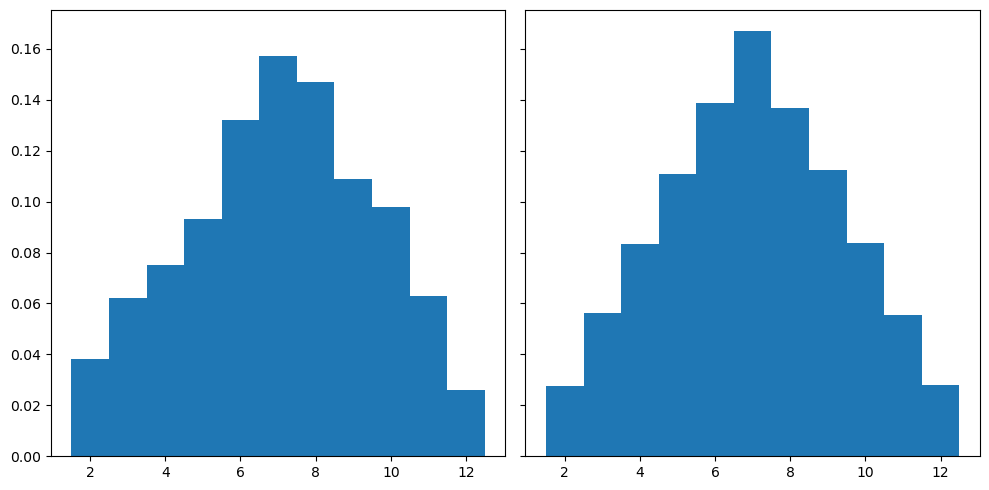

In [6]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
bins = [x + 0.5 for x in range(1, 13)]
ticks = [float(x) for x in range(2, 13, 2)]
for i, data in enumerate([throws_1_000, throws_100_000]):
    axes[i].hist(data, bins=bins, density=True)
    axes[i].set_xticks(ticks)
figure.tight_layout()

## Sequences of dice rolls

When you roll a dice many times, what is the probability to roll two times the same eyes just after another, three times, four times and so on?

First, we write a function to generate a sequence of dice rolls.

In [7]:
def generate_rolls(nr_rolls):
    return random.choices(range(1, 6 + 1), k=nr_rolls)

In [8]:
throws = generate_rolls(10)
throws

[5, 3, 2, 1, 6, 3, 1, 1, 1, 5]

An easy approach is the use `itertools.groupby`, determine the length of the groups and tally those.

In [9]:
def count_repetitions(throws):
    repetitions = collections.defaultdict(int)
    for _, group in itertools.groupby(throws):
        sequence_length = len(tuple(group))
        repetitions[sequence_length] += 1
    return repetitions

In [10]:
count_repetitions(throws)

defaultdict(int, {1: 7, 3: 1})

A second approach is to manually do the accounting.  This is potentially more error prone, and may or may not be faster than the `itertools` approach.

In [11]:
def count_repetitions_naive(throws):
    repetitions = collections.defaultdict(int)
    if len(throws) == 1:
        repetitions[1] = 1
    elif len(throws) > 1:
        sequence_length = 1
        previous_eyes = throws[0]
        for eyes in throws[1:]:
            if eyes == previous_eyes:
                sequence_length += 1
            else:
                repetitions[sequence_length] += 1
                previous_eyes = eyes
                sequence_length = 1
        else:
            repetitions[sequence_length] += 1
    return repetitions

In [12]:
count_repetitions_naive(throws)

defaultdict(int, {1: 7, 3: 1})

The result is the same in both cases.

However, it is good practice to test for a large number of sequences.

In [13]:
for _ in range(1_000):
    nr_thorws = 1_000
    throws = generate_rolls(nr_thorws)
    counts = count_repetitions(throws)
    counts_naive = count_repetitions_naive(throws)
    assert counts_naive == counts, 'counts are not equal'

Which implementation has the best performance?  We should test on a long sequence to obtain mainingful results.

In [14]:
throws = generate_rolls(1_000_000)

In [15]:
%timeit count_repetitions(throws)

170 ms ± 9.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit count_repetitions_naive(throws)

55.1 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


It is clear that for long sequences, the more naive implementation turns out to be the fastest.  We can check whether that is also true for short sequences.

In [17]:
throws = generate_rolls(50)

In [18]:
%timeit count_repetitions(throws)

8.49 µs ± 434 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
%timeit count_repetitions_naive(throws)

3.41 µs ± 222 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


Indeed, for short sequences the result is similar.

What is the distribution of repetitions?  We need a long sequence to compute this.

In [20]:
throws = generate_rolls(10_000_000)

In [21]:
counts = count_repetitions_naive(throws)

In [22]:
counts

defaultdict(int,
            {1: 6946064,
             2: 1156256,
             3: 192761,
             4: 32396,
             5: 5413,
             6: 875,
             7: 135,
             9: 7,
             8: 28,
             10: 1})

We can plot this as a bar chart with a logarithmic $y$-axis.

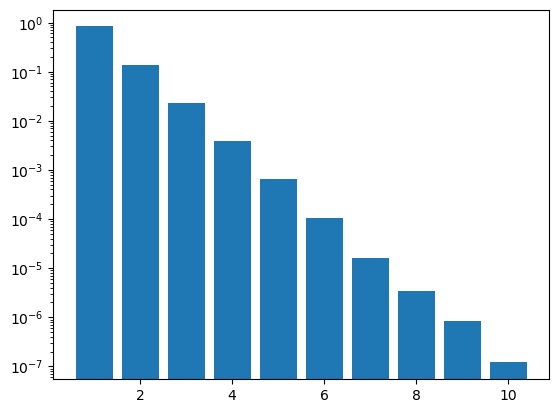

In [23]:
x = list(range(1, max(counts.keys()) + 1))
y = [counts[i]/sum(counts.values()) for i in x]
plt.bar(x, y)
plt.yscale('log');

The probability decreases as expected with the length of the repetitions.